In [156]:
import numpy as np
from matplotlib import pyplot as plt

import cv2

In [114]:
size = 256

mask = np.ones((size, size))
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [115]:
x1, y1, x2, y2 = 3, 3, 7, 7
mask[x1:x2, y1:y2] = 0
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [116]:
center = y1 + (y2 - y1) // 2, x1 + (x2 - x1) // 2
center

(5, 5)

In [154]:
def distance(x1, y1, x2, y2):
    x = np.arange(size)[None, :]
    y = np.arange(size)[:, None]
    center = y1 + (y2 - y1) // 2, x1 + (x2 - x1) // 2
    height = y2 - y1
    width = x2 - x1

    dist = np.sqrt((x - center[0])**2 + 100*(y - center[1])**2)

    # dist = np.maximum(np.abs(x - center[0]) - width / 2, 0) + \
    #           np.maximum(np.abs(y - center[1]) - height / 2, 0)

    dist = np.clip(dist, 0, 1)
    # min_value = dist[x1, y1]
    # max_value = dist[x2, y2 + 50]
    # dist = dist.clip(min_value, max_value)
    # dist = (dist - min_value) / (max_value - min_value)
    return dist

box = 30, 100, 220, 226
x1, y1, x2, y2 = box
distances = distance(*box)

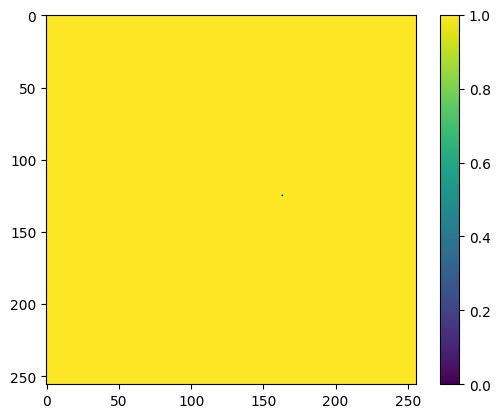

In [155]:
plt.imshow(distances)
plt.colorbar()
plt.show()

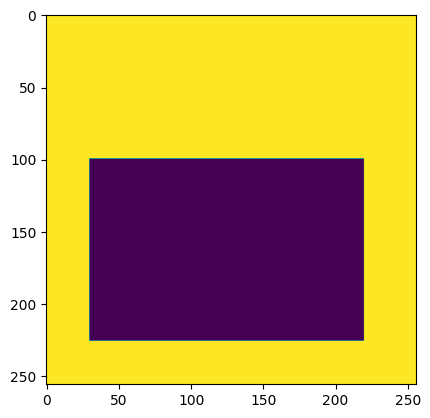

In [145]:
mask = np.ones((size, size))
mask[y1:y2, x1:x2] = 0
plt.imshow(mask)
plt.show()

In [158]:
from PIL import Image

In [177]:
import numpy as np
from scipy.ndimage import median_filter, gaussian_filter


# Apply median blur with a kernel size of 3x3
blurred_array = gaussian_filter(mask, sigma=20)

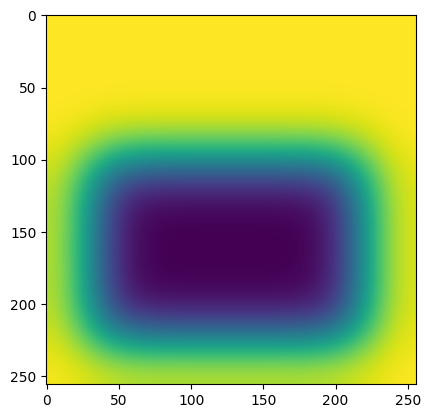

In [178]:
plt.imshow(blurred_array)
plt.show()

In [180]:
import torch
from torchvision import transforms as tf

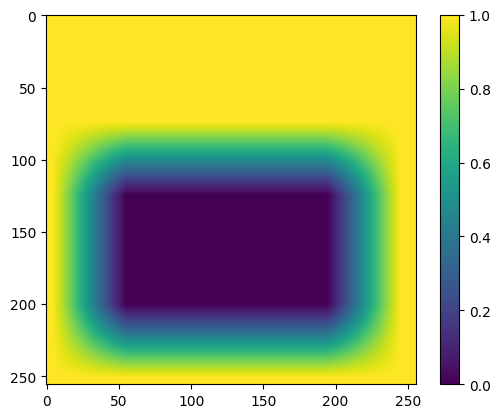

In [199]:
mask = torch.ones((1, size, size))
mask[:, y1:y2, x1:x2] = 0

mask = tf.GaussianBlur(51, sigma=30)(mask)

plt.imshow(mask[0])
plt.colorbar()
plt.show()

In [200]:
from torchvision.transforms import functional as F

In [ ]:
F.gaussian_blur(mask, 51, sigma=30)